<a href="https://colab.research.google.com/github/dquintani/covid/blob/main/epidemiologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lo que falta.
-cambiar las ultimas actualizaciones format a solo mostrar dia mes y año, ocultar segundos
-quitar los decimales en todos los numeros que terminan en ".0".

# Drive
enable this if you want to save stuff in your google colab drive, ALSO cool table display only for drive. before uploading to Github only enable directory = "" and silence the rest.


In [1]:
directory = ""
#from google.colab import drive
#drive.mount("/drive")
#directory = "/drive/My Drive/Colab Notebooks/epidemiologia/"


#interactive table
#from vega_datasets import data
#%load_ext google.colab.data_table

# Dependencias: importante!
if adding new dependency, and notebook is linked to a github workflow, you must make sure all dependencies are also on the requirements.txt too! If not, github workflow will fail and you wiill be very, very sad.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime


#dates
import matplotlib.dates as mdates

#mtick for percentages in axes
import matplotlib.ticker as mtick

#colormaps
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap



#other important requirements

In [3]:
ordenado = ['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']
ordenado

['Bolivia',
 'La Paz',
 'Cochabamba',
 'Santa Cruz',
 'Oruro',
 'Potosí',
 'Chuquisaca',
 'Tarija',
 'Beni',
 'Pando']

In [4]:
habitantes = pd.read_csv("https://raw.githubusercontent.com/dquintani/covid/main/habitantes.csv",index_col = 0)
habitantes = habitantes[['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']]
#habitantes = habitantes[habitantes.columns].apply(pd.to_numeric, errors = "coerce")

habitantes.to_csv(directory + "habitantes.csv")
habitantes


Bolivia   La Paz  Cochabamba  Santa Cruz   Oruro  Potosí  Chuquisaca  \
NaN  11620000  2927000     2029000     3370000  538000  902000      637000   

     Tarija    Beni   Pando  
NaN  583000  480000  154000

# CASOS

Casos diarios y acumulados

In [5]:
casos_diarios = pd.read_csv("https://github.com/mauforonda/covid19-bolivia-udape/raw/master/confirmados_diarios.csv",
                    index_col = 0)
casos_diarios["Bolivia"] = casos_diarios.sum(axis=1)
casos_diarios = casos_diarios[['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']]
casos_diarios.to_csv(directory + "casos_diarios.csv")
casos_diarios.index = pd.to_datetime(casos_diarios.index)
casos_diarios.index[-1]

Timestamp('2021-07-08 00:00:00')

In [6]:
casos_diarios7 = casos_diarios.rolling(7).mean()
casos_diarios7 = casos_diarios7.round(decimals=0)

#casos_diarios7

In [7]:
casos_acumulados = casos_diarios.cumsum(axis = 0)
casos_acumulados.to_csv(directory + "casos_acumulados.csv")

casos_acumulados

Bolivia  La Paz  Cochabamba  Santa Cruz  Oruro  Potosí  \
2020-03-10        0       0           0           0      0       0   
2020-03-11        1       0           0           1      0       0   
2020-03-12        1       0           0           1      0       0   
2020-03-13        8       0           1           1      6       0   
2020-03-14        8       0           1           1      6       0   
...             ...     ...         ...         ...    ...     ...   
2021-07-04   444967   92418       66022      155527  22531   20633   
2021-07-05   446361   92649       66294      156055  22561   20672   
2021-07-06   448212   93261       66586      156613  22603   20740   
2021-07-07   449686   93500       66873      157103  22631   20862   
2021-07-08   451223   93805       67086      157671  22680   20974   

            Chuquisaca  Tarija   Beni  Pando  
2020-03-10           0       0      0      0  
2020-03-11           0       0      0      0  
2020-03-12           0       0      0      0  
2020-03-13           0       0      0      0  
2020-03-14           0       0      0      0  
...                ...     ...    ...    ...  
2021-07-04       27415   33904  19849   6668  
2021-07-05       27539   34054  19853   6684  
2021-07-06       27661   34194  19861   6693  
2021-07-07       27829   34310  19872   6706  
2021-07-08       27962   34438  19896   6711  

[486 rows x 10 columns]

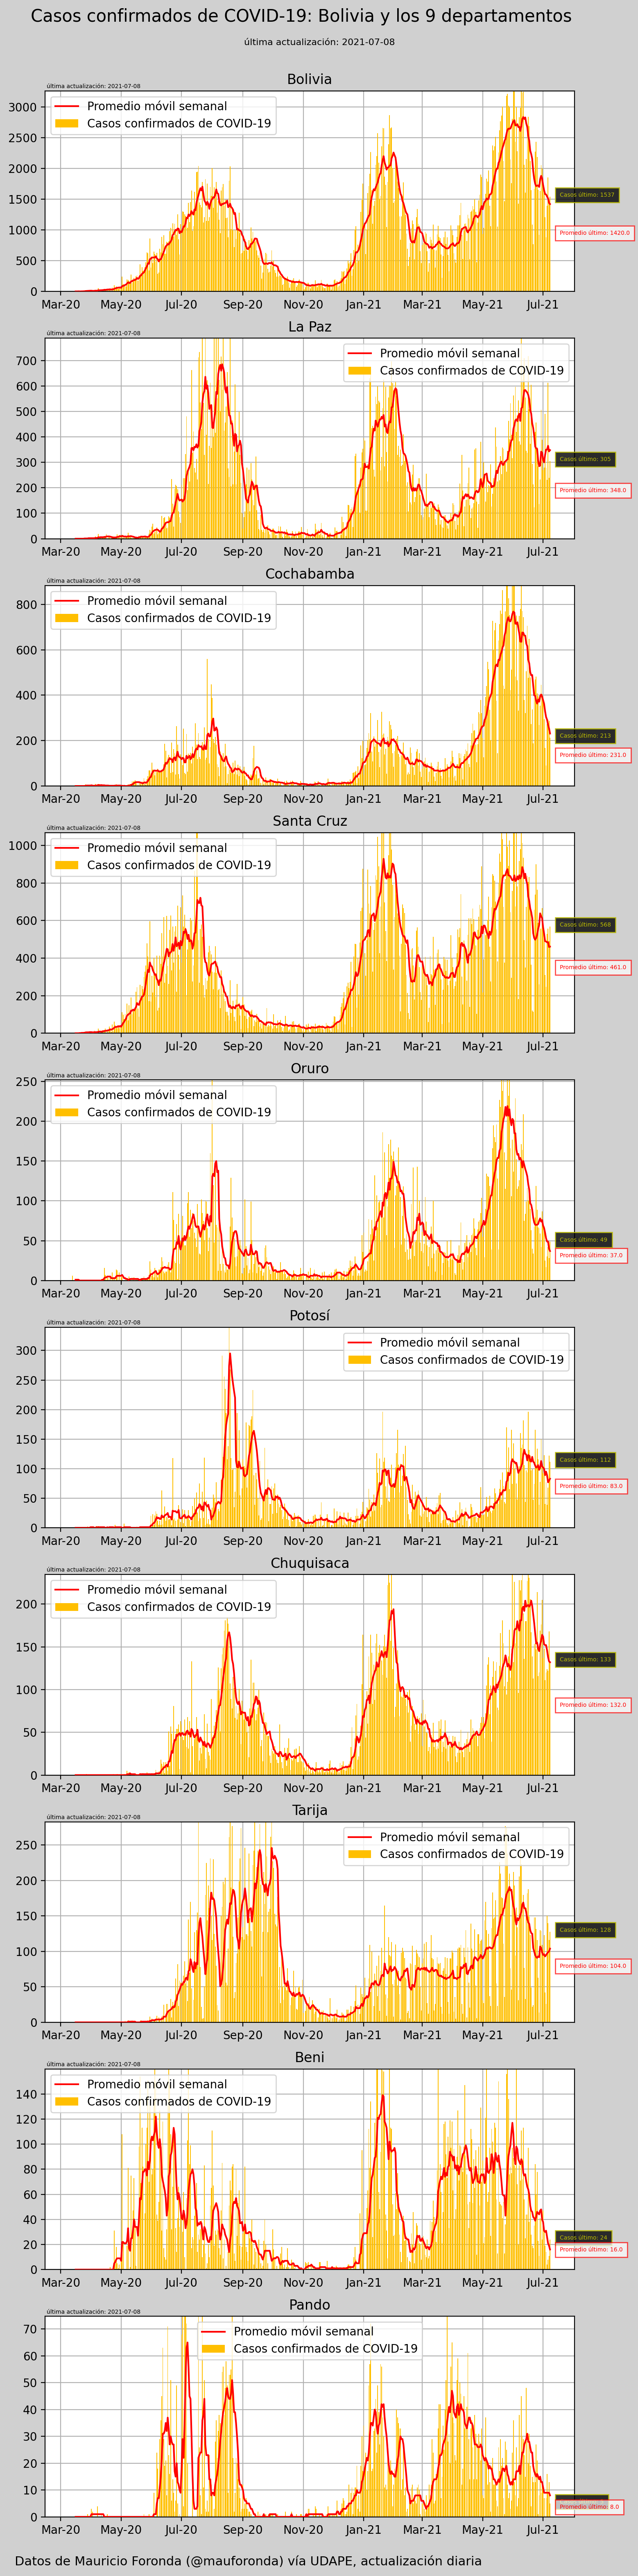

In [8]:
fig, axs = plt.subplots(10,1, figsize = (7,30), dpi=200)
fig.tight_layout(pad=0.39, w_pad=0.5, h_pad=2)

background_color = "#d0d0d0"
background_color2 = "w"
fig.set_facecolor(background_color)

fig.suptitle("Casos confirmados de COVID-19: Bolivia y los 9 departamentos", fontsize= 15, y=1.03)
fig.text(0,-.01,"Datos de Mauricio Foronda (@mauforonda) vía UDAPE, actualización diaria", fontsize=11)
fig.text(.4, 1.015,"última actualización: {}".format(casos_diarios.index[-1].date()), fontsize=8)

for i in range(10):
  axs[i].grid(zorder=3)
  axs[i].bar(casos_diarios.index, casos_diarios[casos_diarios.columns[i]], color = "#ffbf00", label="Casos confirmados de COVID-19",width = .75, zorder=2)
  axs[i].set_title(casos_diarios.columns[i])
  axs[i].plot(casos_diarios.index, casos_diarios7[casos_diarios7.columns[i]], color = "r", label="Promedio móvil semanal",zorder=3)
  axs[i].set_facecolor(background_color2)
  axs[i].set_ylim(0,casos_diarios7[casos_diarios7.columns[i]].max()*1.15)
  axs[i].legend()
  axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

  axs[i].annotate( "Casos último: " + str(casos_diarios.iloc[-1,i]),
      xy = (casos_diarios7.index[-1] + datetime.timedelta(days=10), casos_diarios.iloc[-1,i]),
      fontsize=5,
      color = "y",
      bbox={
              'edgecolor': 'y',
              'facecolor': 'black', 
              'alpha': .8}
          )
  
  axs[i].annotate( "Promedio último: " + str(casos_diarios7.iloc[-1,i]),
      xy = (casos_diarios7.index[-1] + datetime.timedelta(days=10), casos_diarios.iloc[-1,i]*.6),
      fontsize=5,
      color = "r",
      bbox={
              'edgecolor': 'r',
              'facecolor': 'w', 
              'alpha': .7}
          )
  axs[i].text(casos_diarios7.index[1] - datetime.timedelta(days=24), casos_diarios7[casos_diarios7.columns[i]].max()*1.166,"última actualización: {}".format(casos_diarios.index[-1].date()), fontsize=5)




fig.savefig(directory + "graficas/casos_todos.jpg", bbox_inches="tight")

# Muertes

Muertes diarias y acumuladas

In [9]:
muertes_diarias = pd.read_csv("https://github.com/mauforonda/covid19-bolivia-udape/raw/master/decesos_diarios.csv",
                    index_col = 0)
muertes_diarias["Bolivia"] = muertes_diarias.sum(axis=1)
muertes_diarias = muertes_diarias[['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']]

muertes_diarias.to_csv(directory + "muertes_diarias.csv")
muertes_diarias.index = pd.to_datetime(muertes_diarias.index)

muertes_diarias

Bolivia  La Paz  Cochabamba  Santa Cruz  Oruro  Potosí  \
2020-03-10        0       0           0           0      0       0   
2020-03-11        0       0           0           0      0       0   
2020-03-12        0       0           0           0      0       0   
2020-03-13        0       0           0           0      0       0   
2020-03-14        0       0           0           0      0       0   
...             ...     ...         ...         ...    ...     ...   
2021-07-04       31       2           9           2      5       2   
2021-07-05       34       4          13           3      3       0   
2021-07-06       28       6           6           0      2       0   
2021-07-07       54       6           5          22      2      10   
2021-07-08       59       7           2          18     18       3   

            Chuquisaca  Tarija  Beni  Pando  
2020-03-10           0       0     0      0  
2020-03-11           0       0     0      0  
2020-03-12           0       0     0      0  
2020-03-13           0       0     0      0  
2020-03-14           0       0     0      0  
...                ...     ...   ...    ...  
2021-07-04           8       2     1      0  
2021-07-05           4       4     3      0  
2021-07-06           6       4     4      0  
2021-07-07           6       2     1      0  
2021-07-08           3       6     1      1  

[486 rows x 10 columns]

In [10]:
muertes_diarias7 = muertes_diarias.rolling(7).mean()
muertes_diarias7 = muertes_diarias7.round(decimals=1)
muertes_diarias7.tail()

Bolivia  La Paz  Cochabamba  Santa Cruz  Oruro  Potosí  \
2021-07-04     52.9     5.9        10.1        15.4    4.1     5.3   
2021-07-05     50.6     5.7         9.6        15.3    3.9     4.0   
2021-07-06     44.4     5.7         8.1        11.7    3.4     3.3   
2021-07-07     42.9     5.6         7.0        10.9    3.7     4.4   
2021-07-08     43.4     5.6         6.6        11.0    5.9     3.4   

            Chuquisaca  Tarija  Beni  Pando  
2021-07-04         5.7     3.0   2.3    1.0  
2021-07-05         5.7     3.0   2.6    0.9  
2021-07-06         5.7     3.1   2.9    0.4  
2021-07-07         5.6     3.0   2.4    0.3  
2021-07-08         5.1     3.6   2.0    0.3

In [11]:
muertes_acumuladas = muertes_diarias.cumsum(axis = 0)
muertes_acumuladas.to_csv(directory + "muertes_acumuladas.csv")

muertes_acumuladas

Bolivia  La Paz  Cochabamba  Santa Cruz  Oruro  Potosí  \
2020-03-10        0       0           0           0      0       0   
2020-03-11        0       0           0           0      0       0   
2020-03-12        0       0           0           0      0       0   
2020-03-13        0       0           0           0      0       0   
2020-03-14        0       0           0           0      0       0   
...             ...     ...         ...         ...    ...     ...   
2021-07-04    15324    2340        2579        5307   1141     729   
2021-07-05    15358    2344        2592        5310   1144     729   
2021-07-06    15386    2350        2598        5310   1146     729   
2021-07-07    15440    2356        2603        5332   1148     739   
2021-07-08    15499    2363        2605        5350   1166     742   

            Chuquisaca  Tarija  Beni  Pando  
2020-03-10           0       0     0      0  
2020-03-11           0       0     0      0  
2020-03-12           0       0     0      0  
2020-03-13           0       0     0      0  
2020-03-14           0       0     0      0  
...                ...     ...   ...    ...  
2021-07-04        1197     864   852    315  
2021-07-05        1201     868   855    315  
2021-07-06        1207     872   859    315  
2021-07-07        1213     874   860    315  
2021-07-08        1216     880   861    316  

[486 rows x 10 columns]

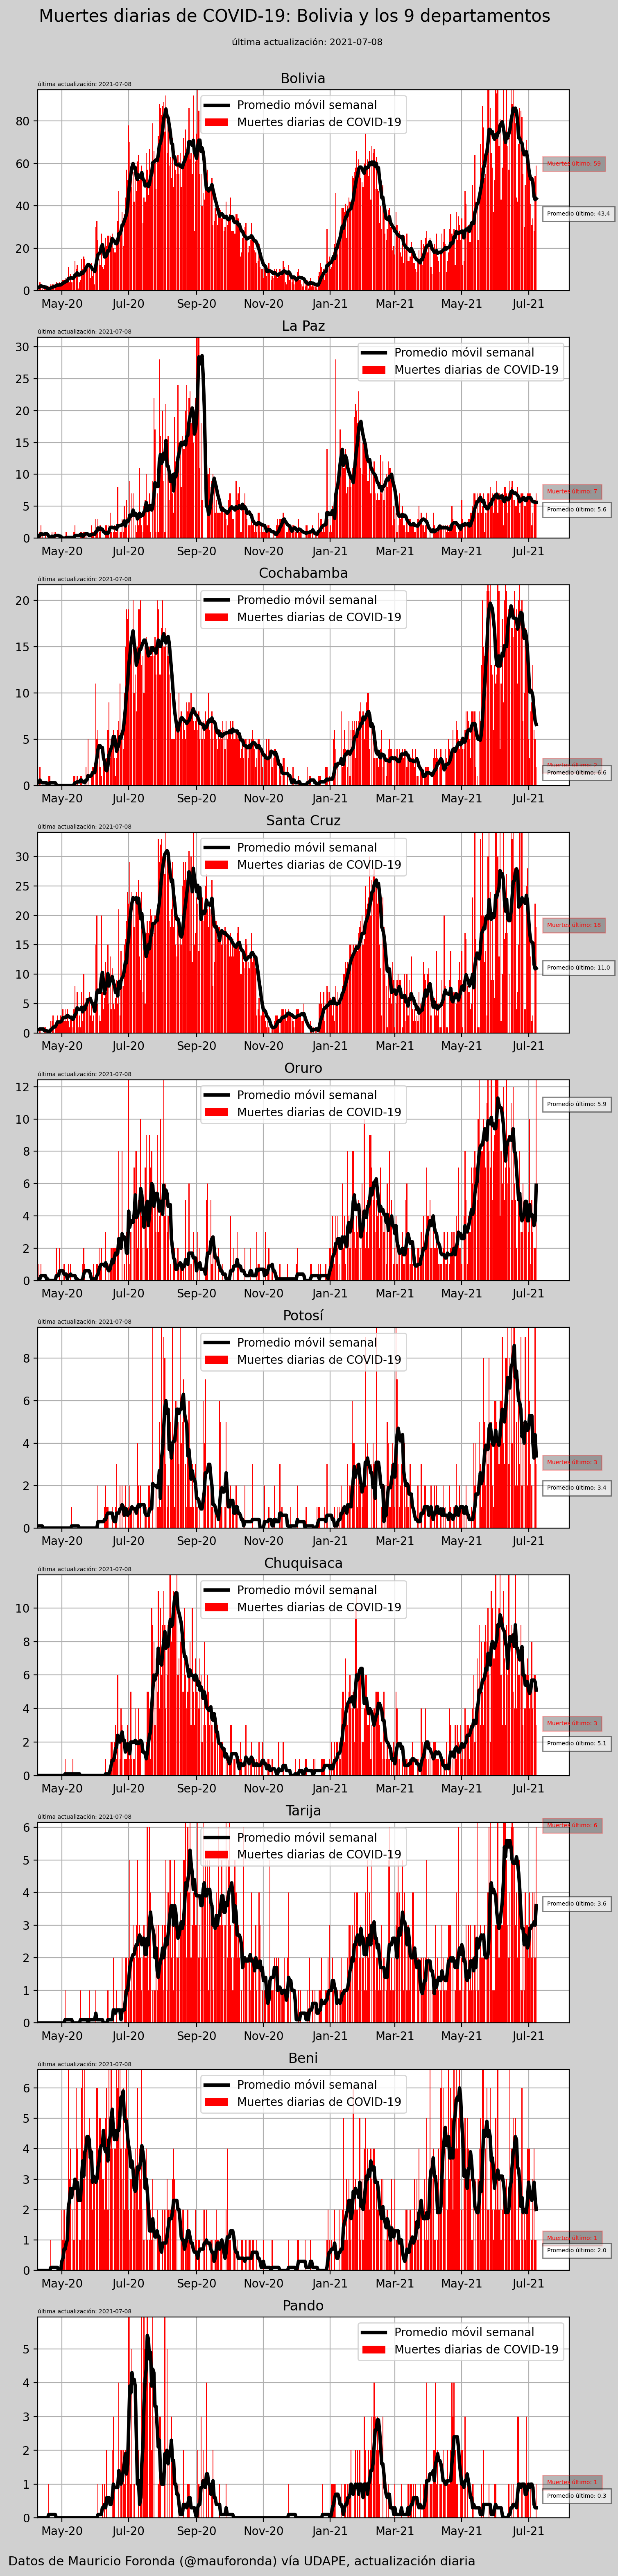

In [12]:
fig, axs = plt.subplots(10,1, figsize = (7,30), dpi=200)
fig.tight_layout(pad=0.3, w_pad=4, h_pad=2)

background_color = "#d0d0d0"
background_color2 = "w"

fig.set_facecolor(background_color)

fig.suptitle("Muertes diarias de COVID-19: Bolivia y los 9 departamentos", fontsize= 15, y=1.03)
fig.text(0,-.01,"Datos de Mauricio Foronda (@mauforonda) vía UDAPE, actualización diaria", fontsize=11)
fig.text(0.39, 1.015,"última actualización: {}".format(muertes_diarias.index[-1].date()), fontsize=8)

for i in range(10):
  axs[i].grid(zorder=3)
  axs[i].bar(muertes_diarias.index, muertes_diarias[muertes_diarias.columns[i]], color = "r", label="Muertes diarias de COVID-19",width=.9,zorder=2)
  axs[i].set_title(muertes_diarias.columns[i])
  axs[i].plot(muertes_diarias.index, muertes_diarias7[muertes_diarias7.columns[i]], color = "black", label="Promedio móvil semanal", zorder=3, linewidth=3)
  axs[i].set_facecolor(background_color2)
  axs[i].set_ylim(0,muertes_diarias7[muertes_diarias7.columns[i]].max()*1.1)
  axs[i].set_xlim(muertes_diarias.index[30], muertes_diarias.index[-1] + datetime.timedelta(days=30))
  axs[i].legend()
  axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

  axs[i].annotate( "Muertes último: " + str(muertes_diarias.iloc[-1,i]),
      xy = (muertes_diarias.index[-1] + datetime.timedelta(days=10), muertes_diarias.iloc[-1,i]),
      fontsize=5,
      color = "r",
      bbox={
              'edgecolor': 'r',
              'facecolor': 'black', 
              'alpha': .28}
          )
  
  axs[i].annotate( "Promedio último: " + str(muertes_diarias7.iloc[-1,i]),
      xy = (muertes_diarias7.index[-1] + datetime.timedelta(days=10), muertes_diarias.iloc[-1,i]*.6),
      fontsize=5,
      color = "black",
      bbox={
              'edgecolor': 'black',
              'facecolor': 'w', 
              'alpha': .5}
          )

  axs[i].text(muertes_diarias7.index[30], muertes_diarias7[muertes_diarias7.columns[i]].max()*1.12,"última actualización: {}".format(muertes_diarias7.index[-1].date()), fontsize=5)


fig.savefig(directory + "graficas/muertes_todos.jpg", bbox_inches="tight")

# Pruebas
Pruebas acumuladas = (casos acumulados)+(descartados acumulados)

In [13]:
pruebas_edu = pd.read_csv("https://raw.githubusercontent.com/pr0nstar/covid19-data/master/processed/bolivia/testing.csv",
                    index_col = 0)
pruebas_edu = pruebas_edu[pruebas_edu.columns].apply(pd.to_numeric, errors = "coerce")
pruebas_edu.index = pd.to_datetime(pruebas_edu.index)

#pruebas_edu

In [14]:
col_names = ['La Paz', 'Cochabamba', 'Santa Cruz','Oruro','Potosí','Tarija','Chuquisaca', 'Beni','Pando']

In [15]:
descartados = pruebas_edu.iloc[1:,[1,3,5,7,9,11,13,15,17]]
for i in range(9):
    descartados.rename(columns={descartados.columns[i] : col_names[i]}, inplace=True)
descartados["Bolivia"] = descartados.sum(axis=1, min_count=9)

descartados.to_csv(directory + "descartados_acumulados.csv")

#descartados

In [16]:
sospechosos = pruebas_edu.iloc[1:,[0,2,4,6,8,10,12,14,16]]
#for i in range(9):
#    sospechosos.rename(columns={sospechosos.columns[i] : col_names[i]}, inplace=True)
sospechosos["Bolivia"] = sospechosos.sum(axis=1)
#sospechosos

In [17]:
pruebas_acum = casos_acumulados + descartados
pruebas_acum = pruebas_acum.drop(pruebas_acum.index[0:58], axis=0).interpolate()
pruebas_acum = pruebas_acum[['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']]


pruebas_acum.to_csv(directory + "pruebas_acum.csv")

pruebas_acum.tail()

Bolivia    La Paz  Cochabamba  Santa Cruz    Oruro   Potosí  \
2021-07-04  1869708.0  377952.0    334319.0    730423.0  74044.0  69923.0   
2021-07-05  1878499.0  378949.0    336363.0    734315.0  74262.0  70045.0   
2021-07-06  1878499.0  381668.0    338509.0    734315.0  74530.0  70209.0   
2021-07-07  1878499.0  383801.0    340622.0    734315.0  74826.0  70605.0   
2021-07-08  1878499.0  383801.0    340622.0    734315.0  74826.0  70605.0   

            Chuquisaca    Tarija     Beni    Pando  
2021-07-04     95700.0  100192.0  63160.0  23995.0  
2021-07-05     96273.0  100821.0  63364.0  24107.0  
2021-07-06     96770.0  101598.0  63469.0  24190.0  
2021-07-07     97437.0  102146.0  63630.0  24284.0  
2021-07-08     97437.0  102146.0  63630.0  24284.0

In [18]:
pruebas_diarias_NaN = pruebas_acum.diff()

#getting rid of negatives
pruebas_diarias = pruebas_diarias_NaN[pruebas_diarias_NaN > 0 ]
pruebas_diarias.to_csv(directory + "pruebas_diarias.csv")

pruebas_diarias.tail()

Bolivia  La Paz  Cochabamba  Santa Cruz  Oruro  Potosí  \
2021-07-04   5212.0  1997.0       609.0      1355.0  182.0   177.0   
2021-07-05   8791.0   997.0      2044.0      3892.0  218.0   122.0   
2021-07-06      NaN  2719.0      2146.0         NaN  268.0   164.0   
2021-07-07      NaN  2133.0      2113.0         NaN  296.0   396.0   
2021-07-08      NaN     NaN         NaN         NaN    NaN     NaN   

            Chuquisaca  Tarija   Beni  Pando  
2021-07-04       538.0   148.0  165.0   41.0  
2021-07-05       573.0   629.0  204.0  112.0  
2021-07-06       497.0   777.0  105.0   83.0  
2021-07-07       667.0   548.0  161.0   94.0  
2021-07-08         NaN     NaN    NaN    NaN

In [19]:
pruebas_diarias7 = pruebas_diarias.rolling(7,min_periods=1).mean()
pruebas_diarias7

Bolivia       La Paz   Cochabamba   Santa Cruz       Oruro  \
2020-05-07           NaN          NaN          NaN          NaN         NaN   
2020-05-08    457.000000   128.000000    52.000000   157.000000    8.000000   
2020-05-09    537.750000   125.500000    49.000000   206.500000    8.000000   
2020-05-10    564.666667   107.333333    38.333333   253.333333   12.000000   
2020-05-11    578.125000   101.250000    31.000000   351.750000   12.250000   
...                  ...          ...          ...          ...         ...   
2021-07-04  10160.571429  2395.285714  2243.714286  3636.714286  344.142857   
2021-07-05   9919.285714  2379.000000  2066.000000  3566.000000  346.428571   
2021-07-06   9501.833333  2373.285714  1919.000000  3454.666667  331.142857   
2021-07-07   8836.000000  2256.571429  1862.714286  3182.200000  306.000000   
2021-07-08   8050.000000  2189.000000  1759.000000  2787.000000  277.833333   

                Potosí  Chuquisaca      Tarija        Beni      Pando  
2020-05-07         NaN         NaN         NaN         NaN        NaN  
2020-05-08   14.000000    1.000000   13.000000   81.000000   3.000000  
2020-05-09   15.000000   14.500000    7.500000   45.000000   4.166667  
2020-05-10   19.666667   19.000000    7.500000   32.333333   4.555556  
2020-05-11   16.500000   17.000000    5.333333   45.250000   4.750000  
...                ...         ...         ...         ...        ...  
2021-07-04  289.714286  544.000000  423.857143  217.000000  66.142857  
2021-07-05  274.571429  581.714286  425.428571  215.142857  65.000000  
2021-07-06  240.285714  575.714286  450.428571  191.857143  67.142857  
2021-07-07  250.571429  542.000000  455.571429  177.428571  68.571429  
2021-07-08  239.333333  544.500000  462.333333  164.666667  66.500000  

[428 rows x 10 columns]

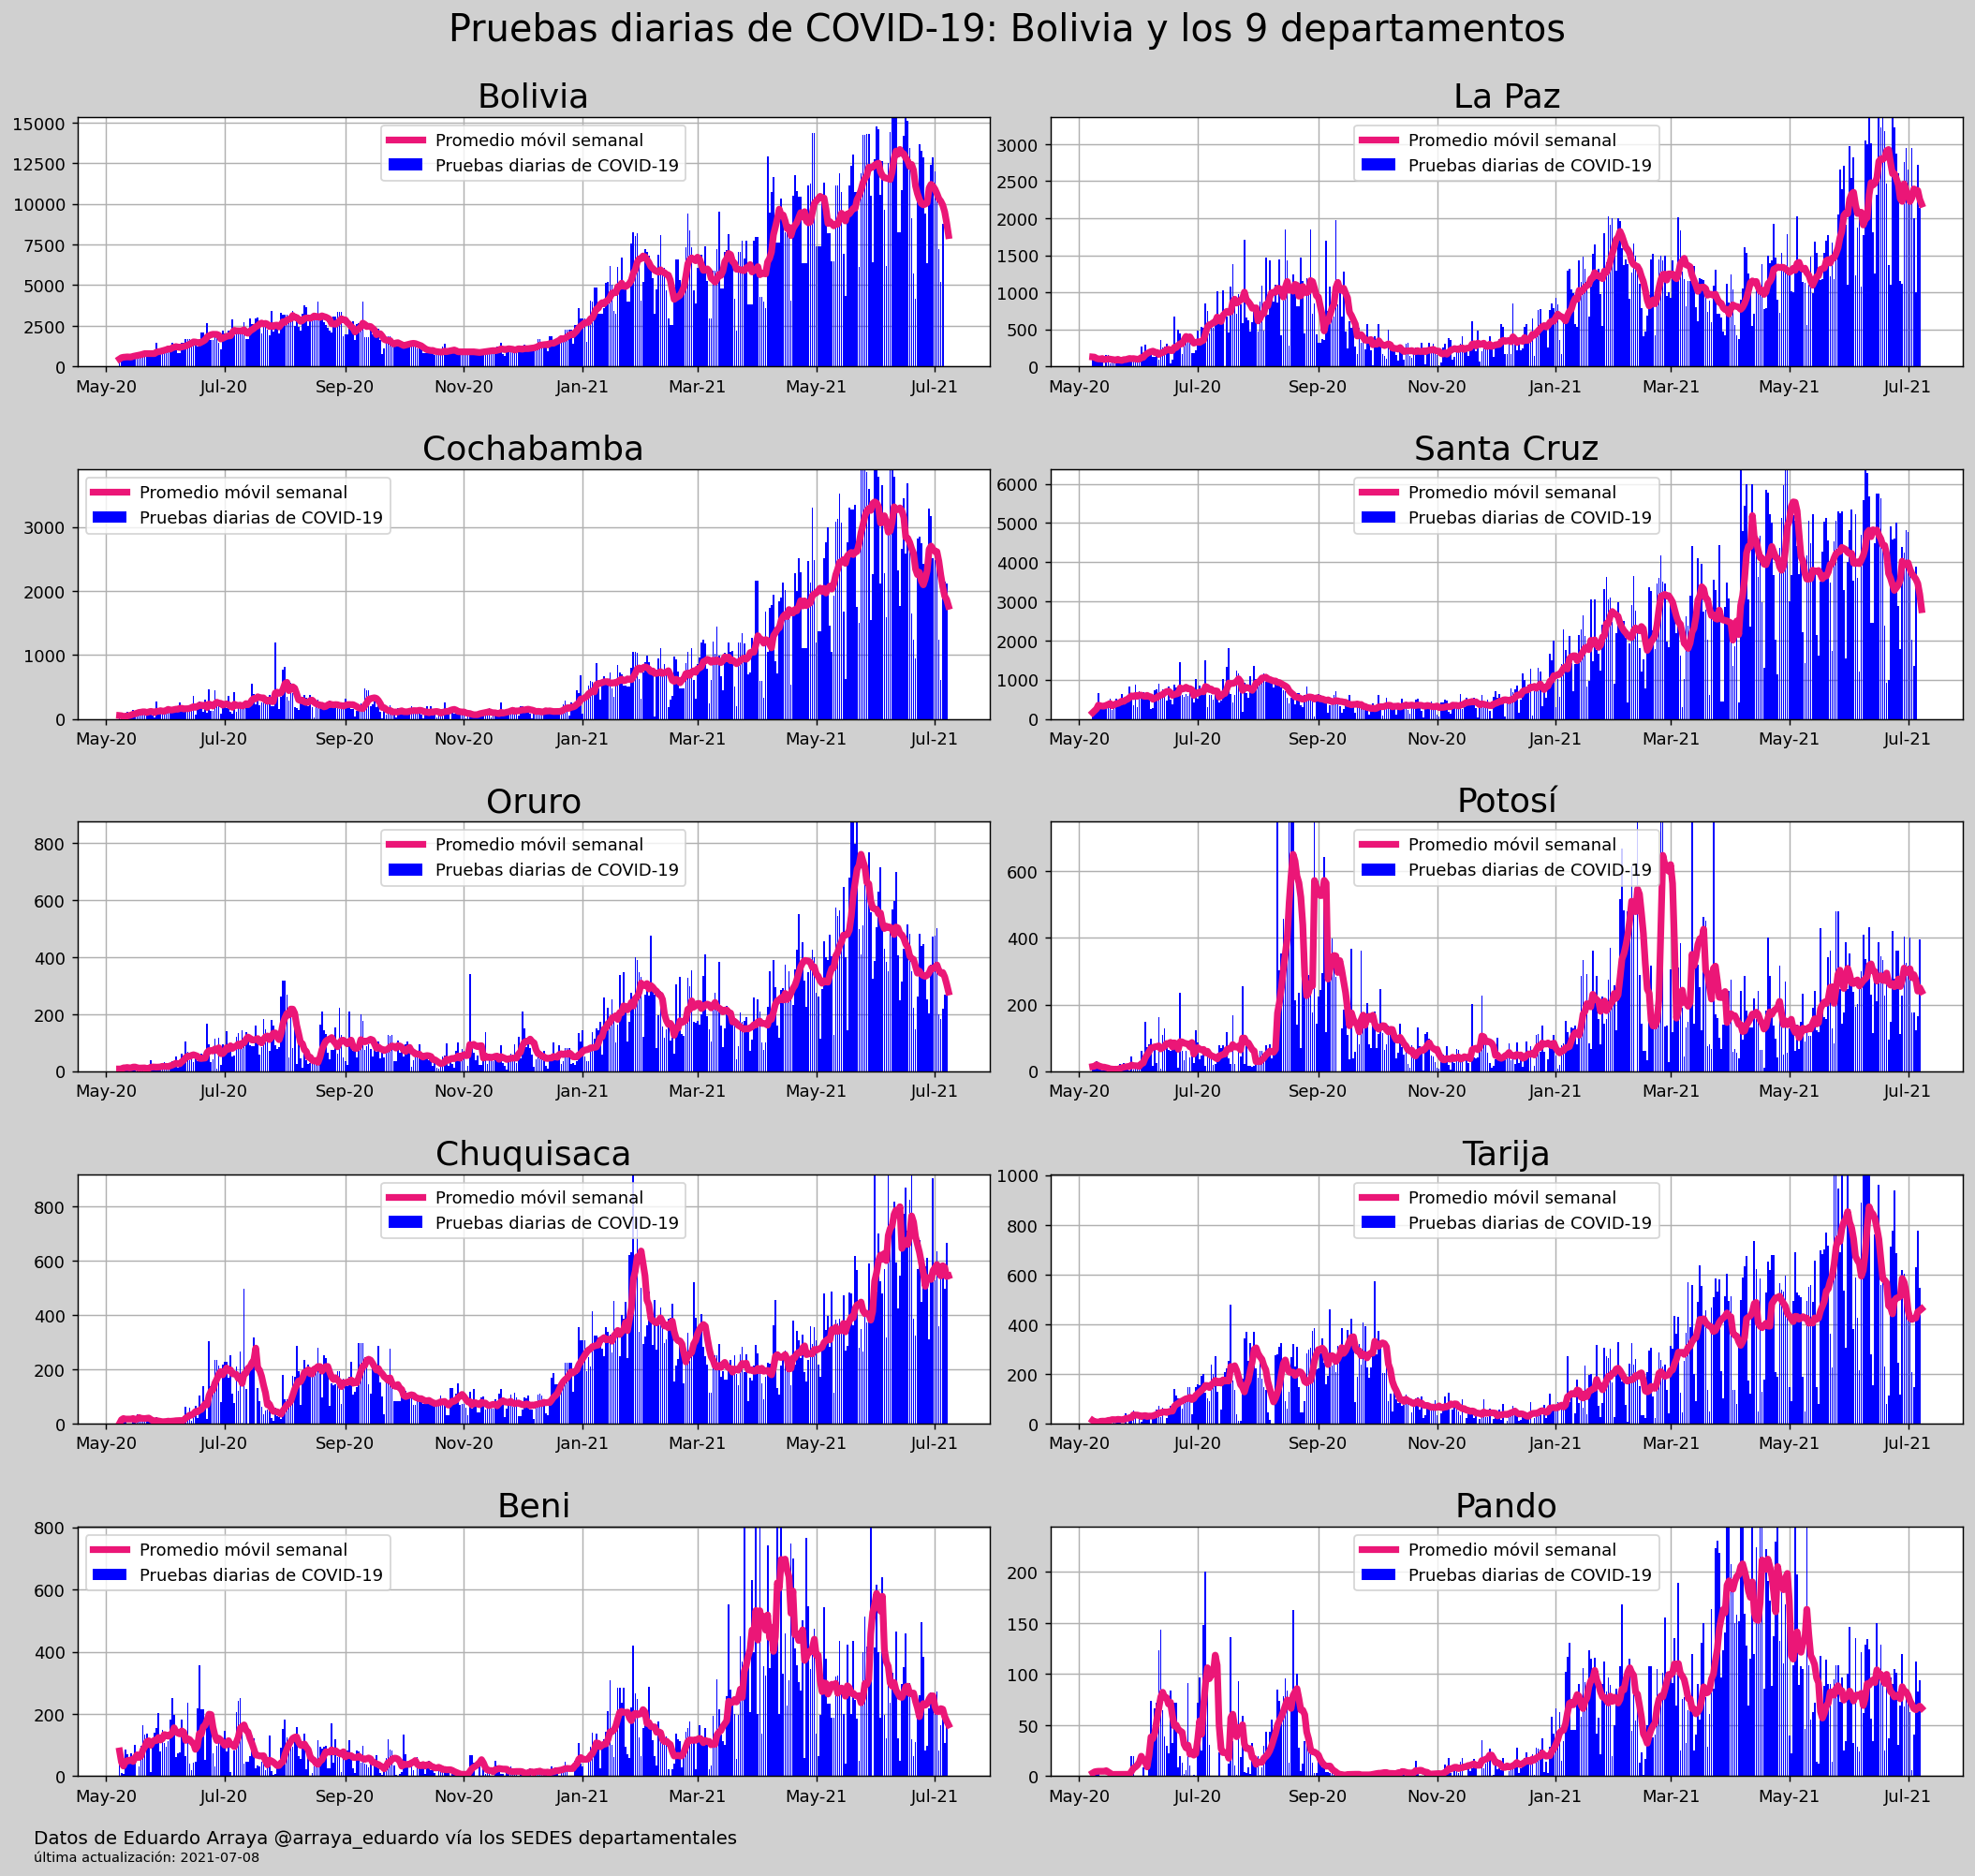

In [20]:
fig, axs = plt.subplots(5,2, figsize = (16,14), dpi=130)
fig.tight_layout(pad=0.3, w_pad=0.5, h_pad=4)
axs = axs.flatten()

background_color = "#d0d0d0"
background_color2 = "w"

fig.set_facecolor(background_color)

fig.suptitle("Pruebas diarias de COVID-19: Bolivia y los 9 departamentos", fontsize= 22, y=1.055)
fig.text(0.0,-.02,"Datos de Eduardo Arraya @arraya_eduardo vía los SEDES departamentales", fontsize=11)
fig.text(0, -.03,"última actualización: {}".format(pruebas_diarias.index[-1].date()), fontsize=8)

for i in range(10):
  axs[i].grid(zorder=1)
  axs[i].bar(pruebas_diarias.index, pruebas_diarias[pruebas_diarias.columns[i]], color = "b", label="Pruebas diarias de COVID-19",width=.8,zorder=2)
  axs[i].set_title(pruebas_diarias.columns[i], fontsize = 20)
  axs[i].plot(pruebas_diarias.index, pruebas_diarias7[pruebas_diarias7.columns[i]], color = "#EB1677", label="Promedio móvil semanal", zorder=3, linewidth=4)
  axs[i].set_facecolor(background_color2)
  axs[i].set_ylim(0,pruebas_diarias7[pruebas_diarias7.columns[i]].max()*1.15)
  axs[i].legend()
  axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))



fig.savefig(directory + "graficas/pruebas_diarias.jpg", bbox_inches="tight")

# Positividad
Positividad = (confirmados)/(pruebas procesadas)

In [21]:
positividad_diaria_raw = casos_diarios / pruebas_diarias
positividad_diaria_raw = positividad_diaria_raw.drop(positividad_diaria_raw.index[0:59])


positividad_diaria_raw.to_csv(directory + "positividad_diaria_raw.csv")

positividad_diaria_raw

Bolivia    La Paz  Cochabamba  Santa Cruz     Oruro    Potosí  \
2020-05-08  0.404814  0.179688    0.153846    0.439490  0.125000  0.000000   
2020-05-09  0.276475  0.056911    0.108696    0.585938  0.625000  0.000000   
2020-05-10  0.192401  0.112676    0.529412    0.276657  0.150000  0.000000   
2020-05-11  0.444624  0.048193    0.555556    0.293663  0.000000  0.142857   
2020-05-12  0.215036  0.029126    0.179487    0.392308  0.222222  0.000000   
...              ...       ...         ...         ...       ...       ...   
2021-07-04  0.168457  0.140210    0.147783    0.182288  0.093407  0.435028   
2021-07-05  0.158571  0.231695    0.133072    0.135663  0.137615  0.319672   
2021-07-06       NaN  0.225083    0.136067         NaN  0.156716  0.414634   
2021-07-07       NaN  0.112049    0.135826         NaN  0.094595  0.308081   
2021-07-08       NaN       NaN         NaN         NaN       NaN       NaN   

            Chuquisaca    Tarija      Beni     Pando  
2020-05-08    0.000000  0.230769  1.000000  0.000000  
2020-05-09    0.107143  0.500000  0.000000  0.000000  
2020-05-10    0.035714       NaN  0.285714  0.000000  
2020-05-11    0.000000  0.000000  0.892857  0.000000  
2020-05-12         NaN  0.136364  0.000000       NaN  
...                ...       ...       ...       ...  
2021-07-04    0.223048  0.175676  0.084848  0.170732  
2021-07-05    0.216405  0.238474  0.019608  0.142857  
2021-07-06    0.245473  0.180180  0.076190  0.108434  
2021-07-07    0.251874  0.211679  0.068323  0.138298  
2021-07-08         NaN       NaN       NaN       NaN  

[427 rows x 10 columns]

In [22]:
# positividad_diaria.plot(figsize = (20,7))
# plt.ylim(0,1)
# plt.title("Positividad diaria de pruebas COVID-19 en Bolivia")

In [23]:
positividad_diaria_adj = positividad_diaria_raw.rolling(7,min_periods=1).mean()


positividad_diaria_adj.to_csv(directory + "positividad_diaria_ajuste.csv")

positividad_diaria_adj

Bolivia    La Paz  Cochabamba  Santa Cruz     Oruro    Potosí  \
2020-05-08  0.404814  0.179688    0.153846    0.439490  0.125000  0.000000   
2020-05-09  0.340645  0.118299    0.131271    0.512714  0.375000  0.000000   
2020-05-10  0.291230  0.116425    0.263985    0.434028  0.300000  0.000000   
2020-05-11  0.329579  0.099367    0.336877    0.398937  0.225000  0.035714   
2020-05-12  0.306670  0.085319    0.305399    0.397611  0.224444  0.028571   
...              ...       ...         ...         ...       ...       ...   
2021-07-04  0.156687  0.150326    0.137768    0.140704  0.155874  0.327167   
2021-07-05  0.157080  0.153594    0.141441    0.141979  0.133808  0.323963   
2021-07-06  0.155693  0.159497    0.140857    0.143717  0.140196  0.330155   
2021-07-07  0.155641  0.156666    0.137182    0.144808  0.127377  0.328752   
2021-07-08  0.159869  0.165872    0.135029    0.151722  0.123695  0.335326   

            Chuquisaca    Tarija      Beni     Pando  
2020-05-08    0.000000  0.230769  1.000000  0.000000  
2020-05-09    0.053571  0.365385  0.500000  0.000000  
2020-05-10    0.047619  0.365385  0.428571  0.000000  
2020-05-11    0.035714  0.243590  0.544643  0.000000  
2020-05-12    0.035714  0.216783  0.435714  0.000000  
...                ...       ...       ...       ...  
2021-07-04    0.303855  0.218288  0.149398  0.118537  
2021-07-05    0.256637  0.222305  0.125207  0.121088  
2021-07-06    0.245058  0.217433  0.114770  0.117671  
2021-07-07    0.248608  0.217260  0.111444  0.115319  
2021-07-08    0.246716  0.212104  0.099178  0.111905  

[427 rows x 10 columns]

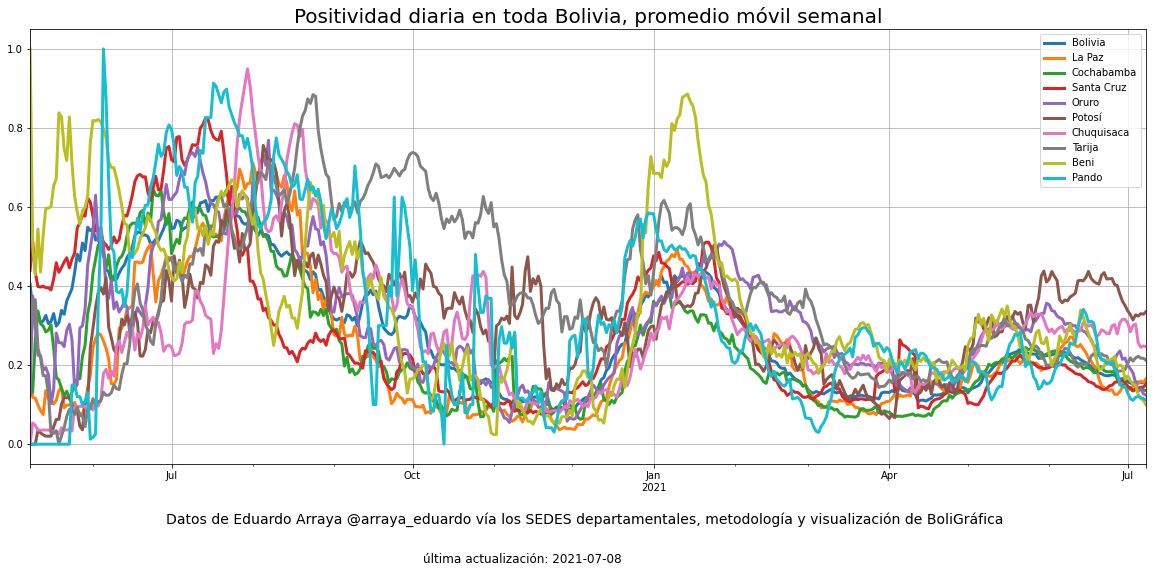

In [24]:
positividad_diaria_adj.plot(figsize = (20,8),zorder=2, linewidth=3)

plt.grid(zorder=1)
plt.title("Positividad diaria en toda Bolivia, promedio móvil semanal", fontsize =20)

plt.text(18442,-.2,"Datos de Eduardo Arraya @arraya_eduardo vía los SEDES departamentales, metodología y visualización de BoliGráfica", fontsize=14)
plt.text(18540, -.3,"última actualización: {}".format(pruebas_diarias.index[-1].date()), fontsize=12)
#axs.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
#.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))


plt.savefig(directory + "graficas/positividad_diaria_todos.jpg", dpi=120)

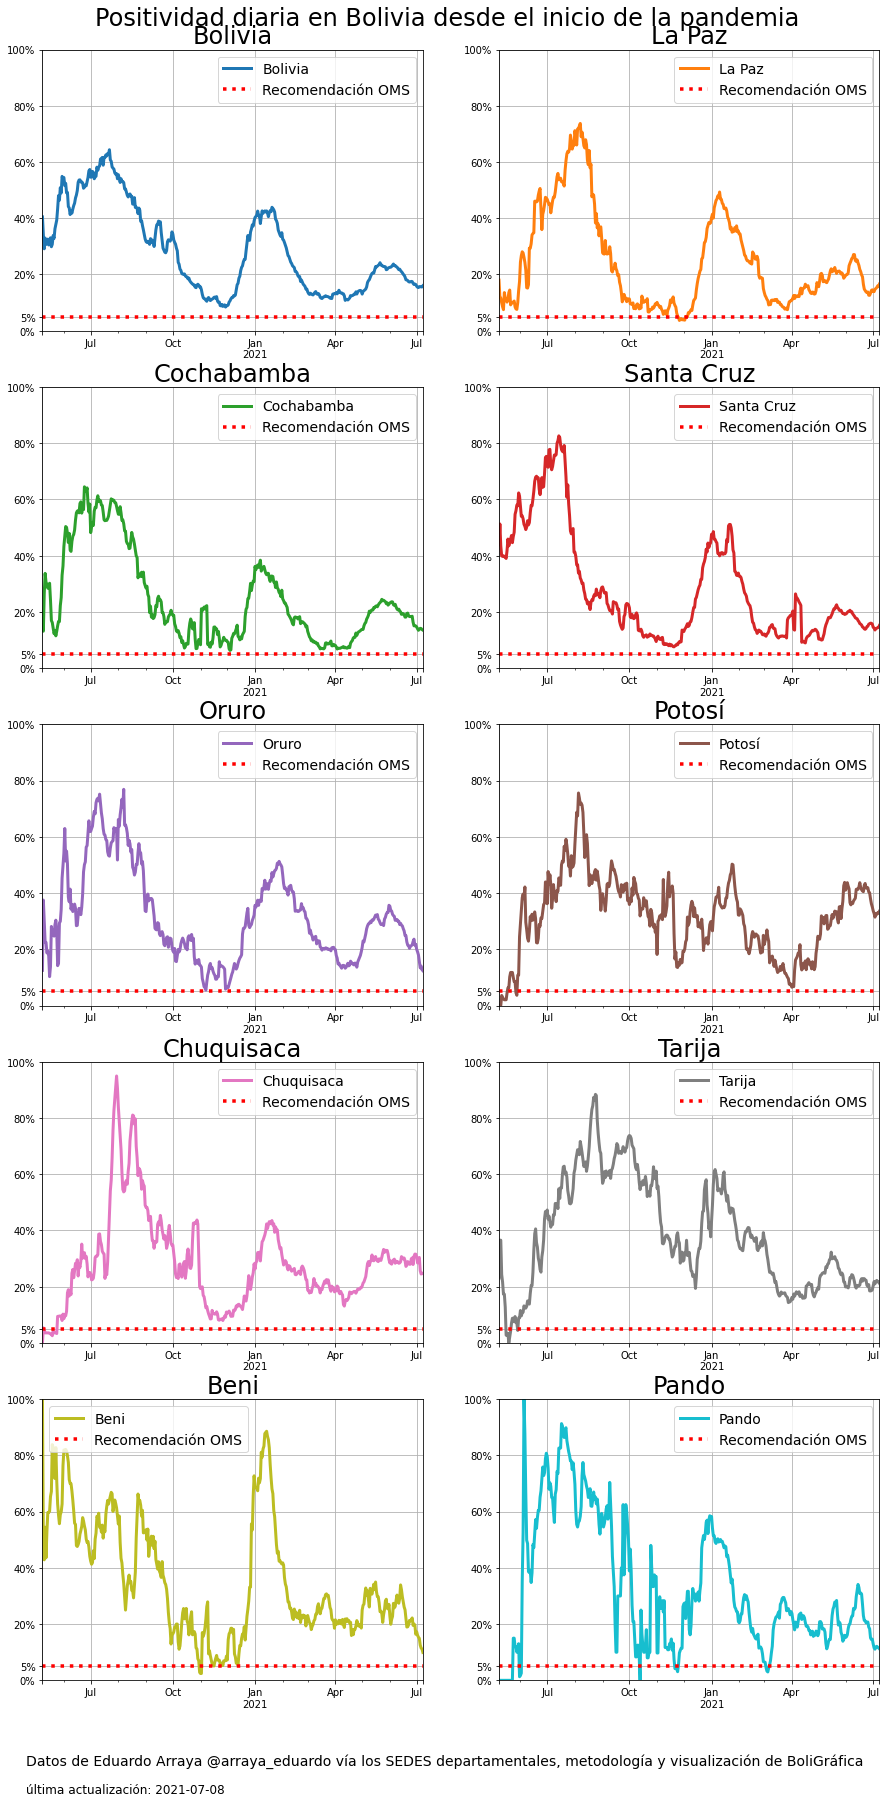

In [25]:
axs = positividad_diaria_adj.interpolate().plot(subplots=True, layout=(5,2), sharey=False, sharex=False, figsize = (15,30), linewidth = 3)

axs[0][0].get_figure().suptitle('Positividad diaria en Bolivia desde el inicio de la pandemia', y=.9, fontsize = 24)
axs = axs.flatten()

for i in range(10):
  axs[i].grid()
  axs[i].set_title(positividad_diaria_adj.columns[i], fontsize = 24)
  axs[i].set_ylim(0,1)
  axs[i].set_yticks((0,0.05,.2,.4,.6,.8,1))
  axs[i].axhline(y=0.05, color='r', linestyle='dotted',label="Recomendación OMS", linewidth=3.5)
  axs[i].legend(fontsize = 14)
  axs[i].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

plt.text(17860,-.3,"Datos de Eduardo Arraya @arraya_eduardo vía los SEDES departamentales, metodología y visualización de BoliGráfica", fontsize=14)
plt.text(17860, -.4,"última actualización: {}".format(pruebas_diarias.index[-1].date()), fontsize=12)

plt.savefig(directory + "graficas/positividad_diaria_subplots.jpg", dpi=120)

In [26]:
# axs = positividad_diaria_adj.interpolate().plot(subplots=True, layout=(2,5), sharey=False, figsize = (20,8))

# axs[0][0].get_figure().suptitle('Positividad diaria en Bolivia desde enero 2021, media móvil de 7 días', y=.96, fontsize = 24)
# axs = axs.flatten()

# for i in range(10):
#   axs[i].grid()
#   axs[i].set_ylim(0,1)
#   axs[i].set_yticks((0,0.05,.2,.4,.6,.8,1))
#   axs[i].axhline(y=0.05, color='r', linestyle='dotted',label="Recomendación OMS")
#   axs[i].legend()
#   axs[i].set_xlim("2021-01-01", positividad_diaria_adj.index[-1])


# plt.savefig(directory + "positividad_2021.jpg")

#MIX

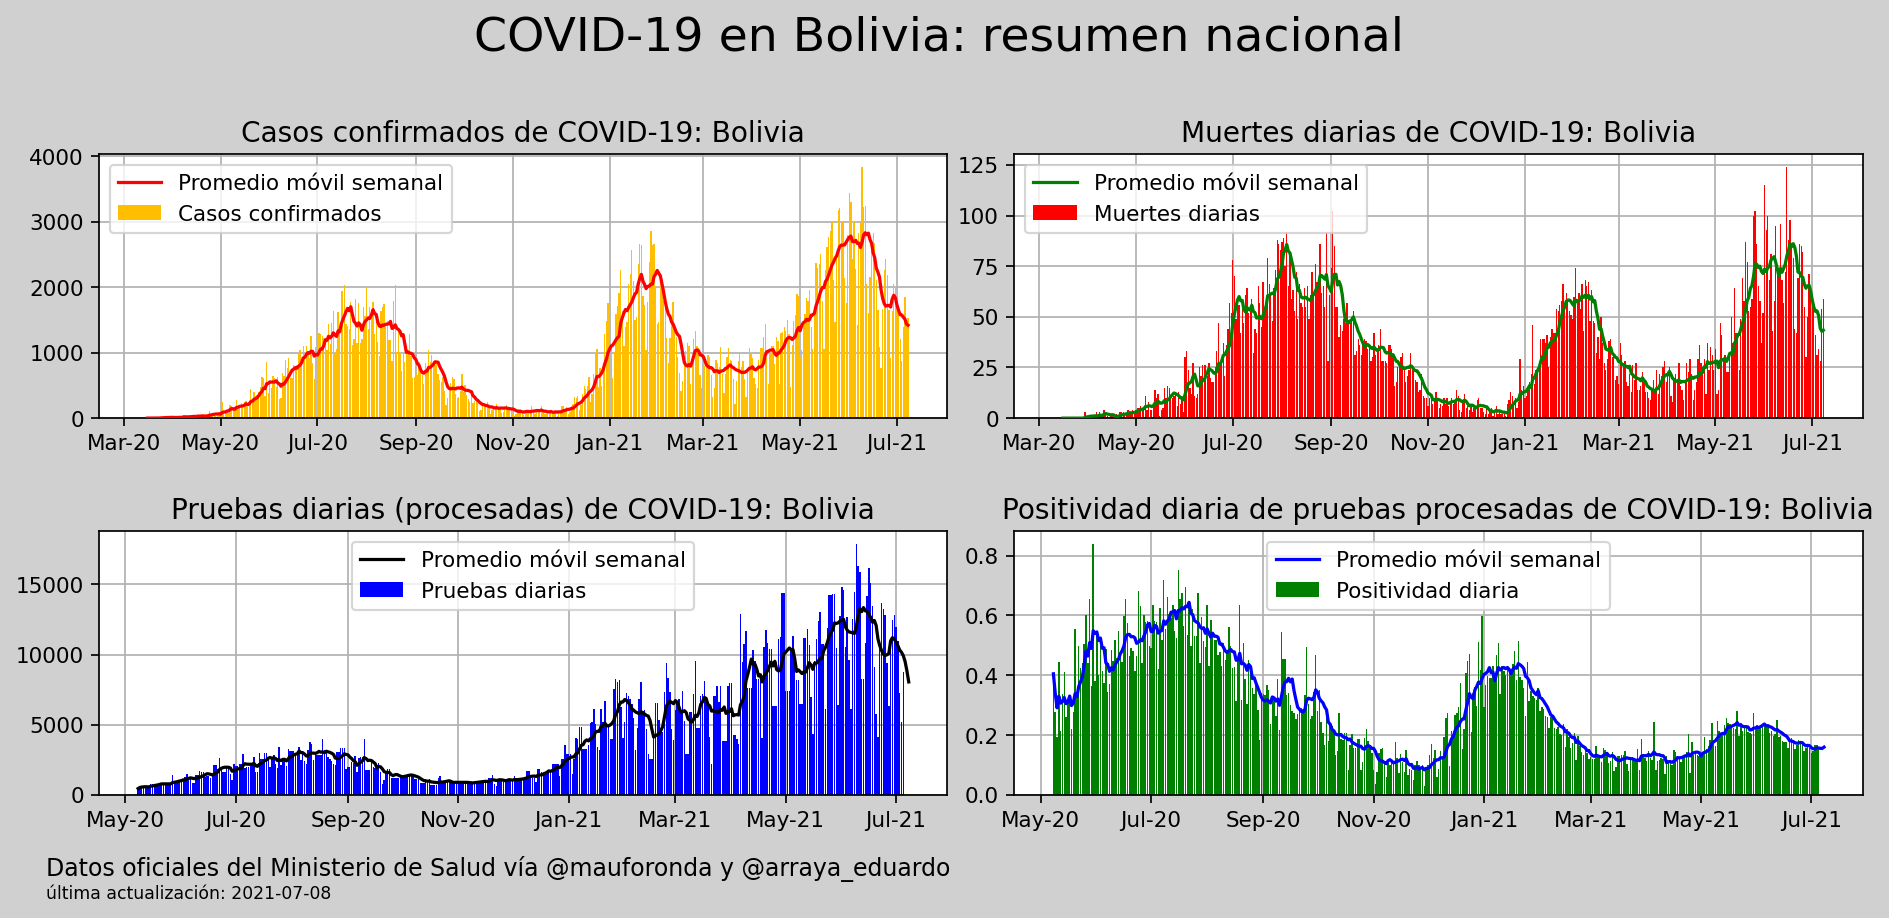

In [27]:
fig, axs = plt.subplots(2,2, figsize = (12,5), dpi=155)
axs = axs.flatten()
fig.tight_layout(pad=0.3, w_pad=0.5, h_pad=2)

background_color = "#d0d0d0"
background_color2 = "w"

fig.set_facecolor(background_color)

fig.suptitle("COVID-19 en Bolivia: resumen nacional", fontsize= 22, y=1.06)
fig.text(0.02,-.05,"Datos oficiales del Ministerio de Salud vía @mauforonda y @arraya_eduardo", fontsize=11)
fig.text(.02, -.08,"última actualización: {}".format(muertes_diarias.index[-1].date()), fontsize=8)

axs[0].grid(zorder=3)
axs[0].set_title("Casos confirmados de COVID-19: Bolivia", fontsize=13) 
axs[0].bar(casos_diarios.index, casos_diarios.Bolivia, color = "#ffbf00", label="Casos confirmados",width=.8,zorder=2)
axs[0].plot(casos_diarios.index, casos_diarios7.Bolivia, color = "r", label="Promedio móvil semanal", zorder=3)
axs[0].set_facecolor(background_color2)
#axs[0].set_ylim(0,casos_diarios7[casos_diarios7.columns[i]].max()*1.15)
axs[0].legend()
axs[0].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

axs[1].grid(zorder=3)
axs[1].set_title("Muertes diarias de COVID-19: Bolivia", fontsize=13) 
axs[1].bar(muertes_diarias.index, muertes_diarias.Bolivia, color = "r", label="Muertes diarias",width=.8,zorder=2)
axs[1].plot(muertes_diarias.index, muertes_diarias7.Bolivia, color = "g", label="Promedio móvil semanal", zorder=3)
axs[1].set_facecolor(background_color2)
#axs[1].set_ylim(0,muertes_diarias7[muertes_diarias7.columns[i]].max()*1.15)
axs[1].legend()
axs[1].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))


axs[2].grid(zorder=3)
axs[2].set_title("Pruebas diarias (procesadas) de COVID-19: Bolivia", fontsize=13) 
axs[2].bar(pruebas_diarias.index, pruebas_diarias.Bolivia, color = "b", label="Pruebas diarias",width=.8,zorder=2)
axs[2].plot(pruebas_diarias.index, pruebas_diarias7.Bolivia, color = "black", label="Promedio móvil semanal", zorder=3)
axs[2].set_facecolor(background_color2)
#axs[2].set_ylim(0,pruebas_diarias7[pruebas_diarias7.columns[i]].max()*1.15)
axs[2].legend()
axs[2].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))


axs[3].grid(zorder=3)
axs[3].set_title("Positividad diaria de pruebas procesadas de COVID-19: Bolivia", fontsize=13) 
axs[3].bar(positividad_diaria_raw.index, positividad_diaria_raw.Bolivia, color = "g", label="Positividad diaria",width=.8,zorder=2)
axs[3].plot(positividad_diaria_raw.index, positividad_diaria_adj.Bolivia, color = "b", label="Promedio móvil semanal", zorder=3)
axs[3].set_facecolor(background_color2)
#axs[3].set_ylim(0,positividad_diaria_adj[positividad_diaria_adj.olumns[i]].max()*1.15)
axs[3].legend()
axs[3].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))


fig.tight_layout(pad=0.3, w_pad=0.5, h_pad=2)


fig.savefig(directory + "graficas/resumen_nacional.jpg", bbox_inches="tight")

#ACTIVOS


In [28]:
activos = casos_diarios.rolling(14).sum()-muertes_diarias.rolling(14).sum()
activos.index = pd.to_datetime(activos.index)

activos

Bolivia  La Paz  Cochabamba  Santa Cruz  Oruro  Potosí  \
2020-03-10      NaN     NaN         NaN         NaN    NaN     NaN   
2020-03-11      NaN     NaN         NaN         NaN    NaN     NaN   
2020-03-12      NaN     NaN         NaN         NaN    NaN     NaN   
2020-03-13      NaN     NaN         NaN         NaN    NaN     NaN   
2020-03-14      NaN     NaN         NaN         NaN    NaN     NaN   
...             ...     ...         ...         ...    ...     ...   
2021-07-04  22102.0  4356.0      4544.0      7176.0  833.0  1281.0   
2021-07-05  22740.0  4378.0      4626.0      7593.0  826.0  1275.0   
2021-07-06  22965.0  4866.0      4542.0      7508.0  803.0  1276.0   
2021-07-07  22201.0  4684.0      4379.0      7273.0  758.0  1225.0   
2021-07-08  21334.0  4532.0      4128.0      6960.0  673.0  1236.0   

            Chuquisaca  Tarija   Beni  Pando  
2020-03-10         NaN     NaN    NaN    NaN  
2020-03-11         NaN     NaN    NaN    NaN  
2020-03-12         NaN     NaN    NaN    NaN  
2020-03-13         NaN     NaN    NaN    NaN  
2020-03-14         NaN     NaN    NaN    NaN  
...                ...     ...    ...    ...  
2021-07-04      2001.0  1269.0  494.0  148.0  
2021-07-05      2016.0  1393.0  479.0  154.0  
2021-07-06      1985.0  1385.0  451.0  149.0  
2021-07-07      1999.0  1356.0  378.0  149.0  
2021-07-08      1991.0  1347.0  341.0  126.0  

[486 rows x 10 columns]

In [29]:
act_colors = []
viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap("inferno")
list(viridis(range(12)))

viridis(range(10))[3]

array([0.220057, 0.343307, 0.549413, 1.      ])

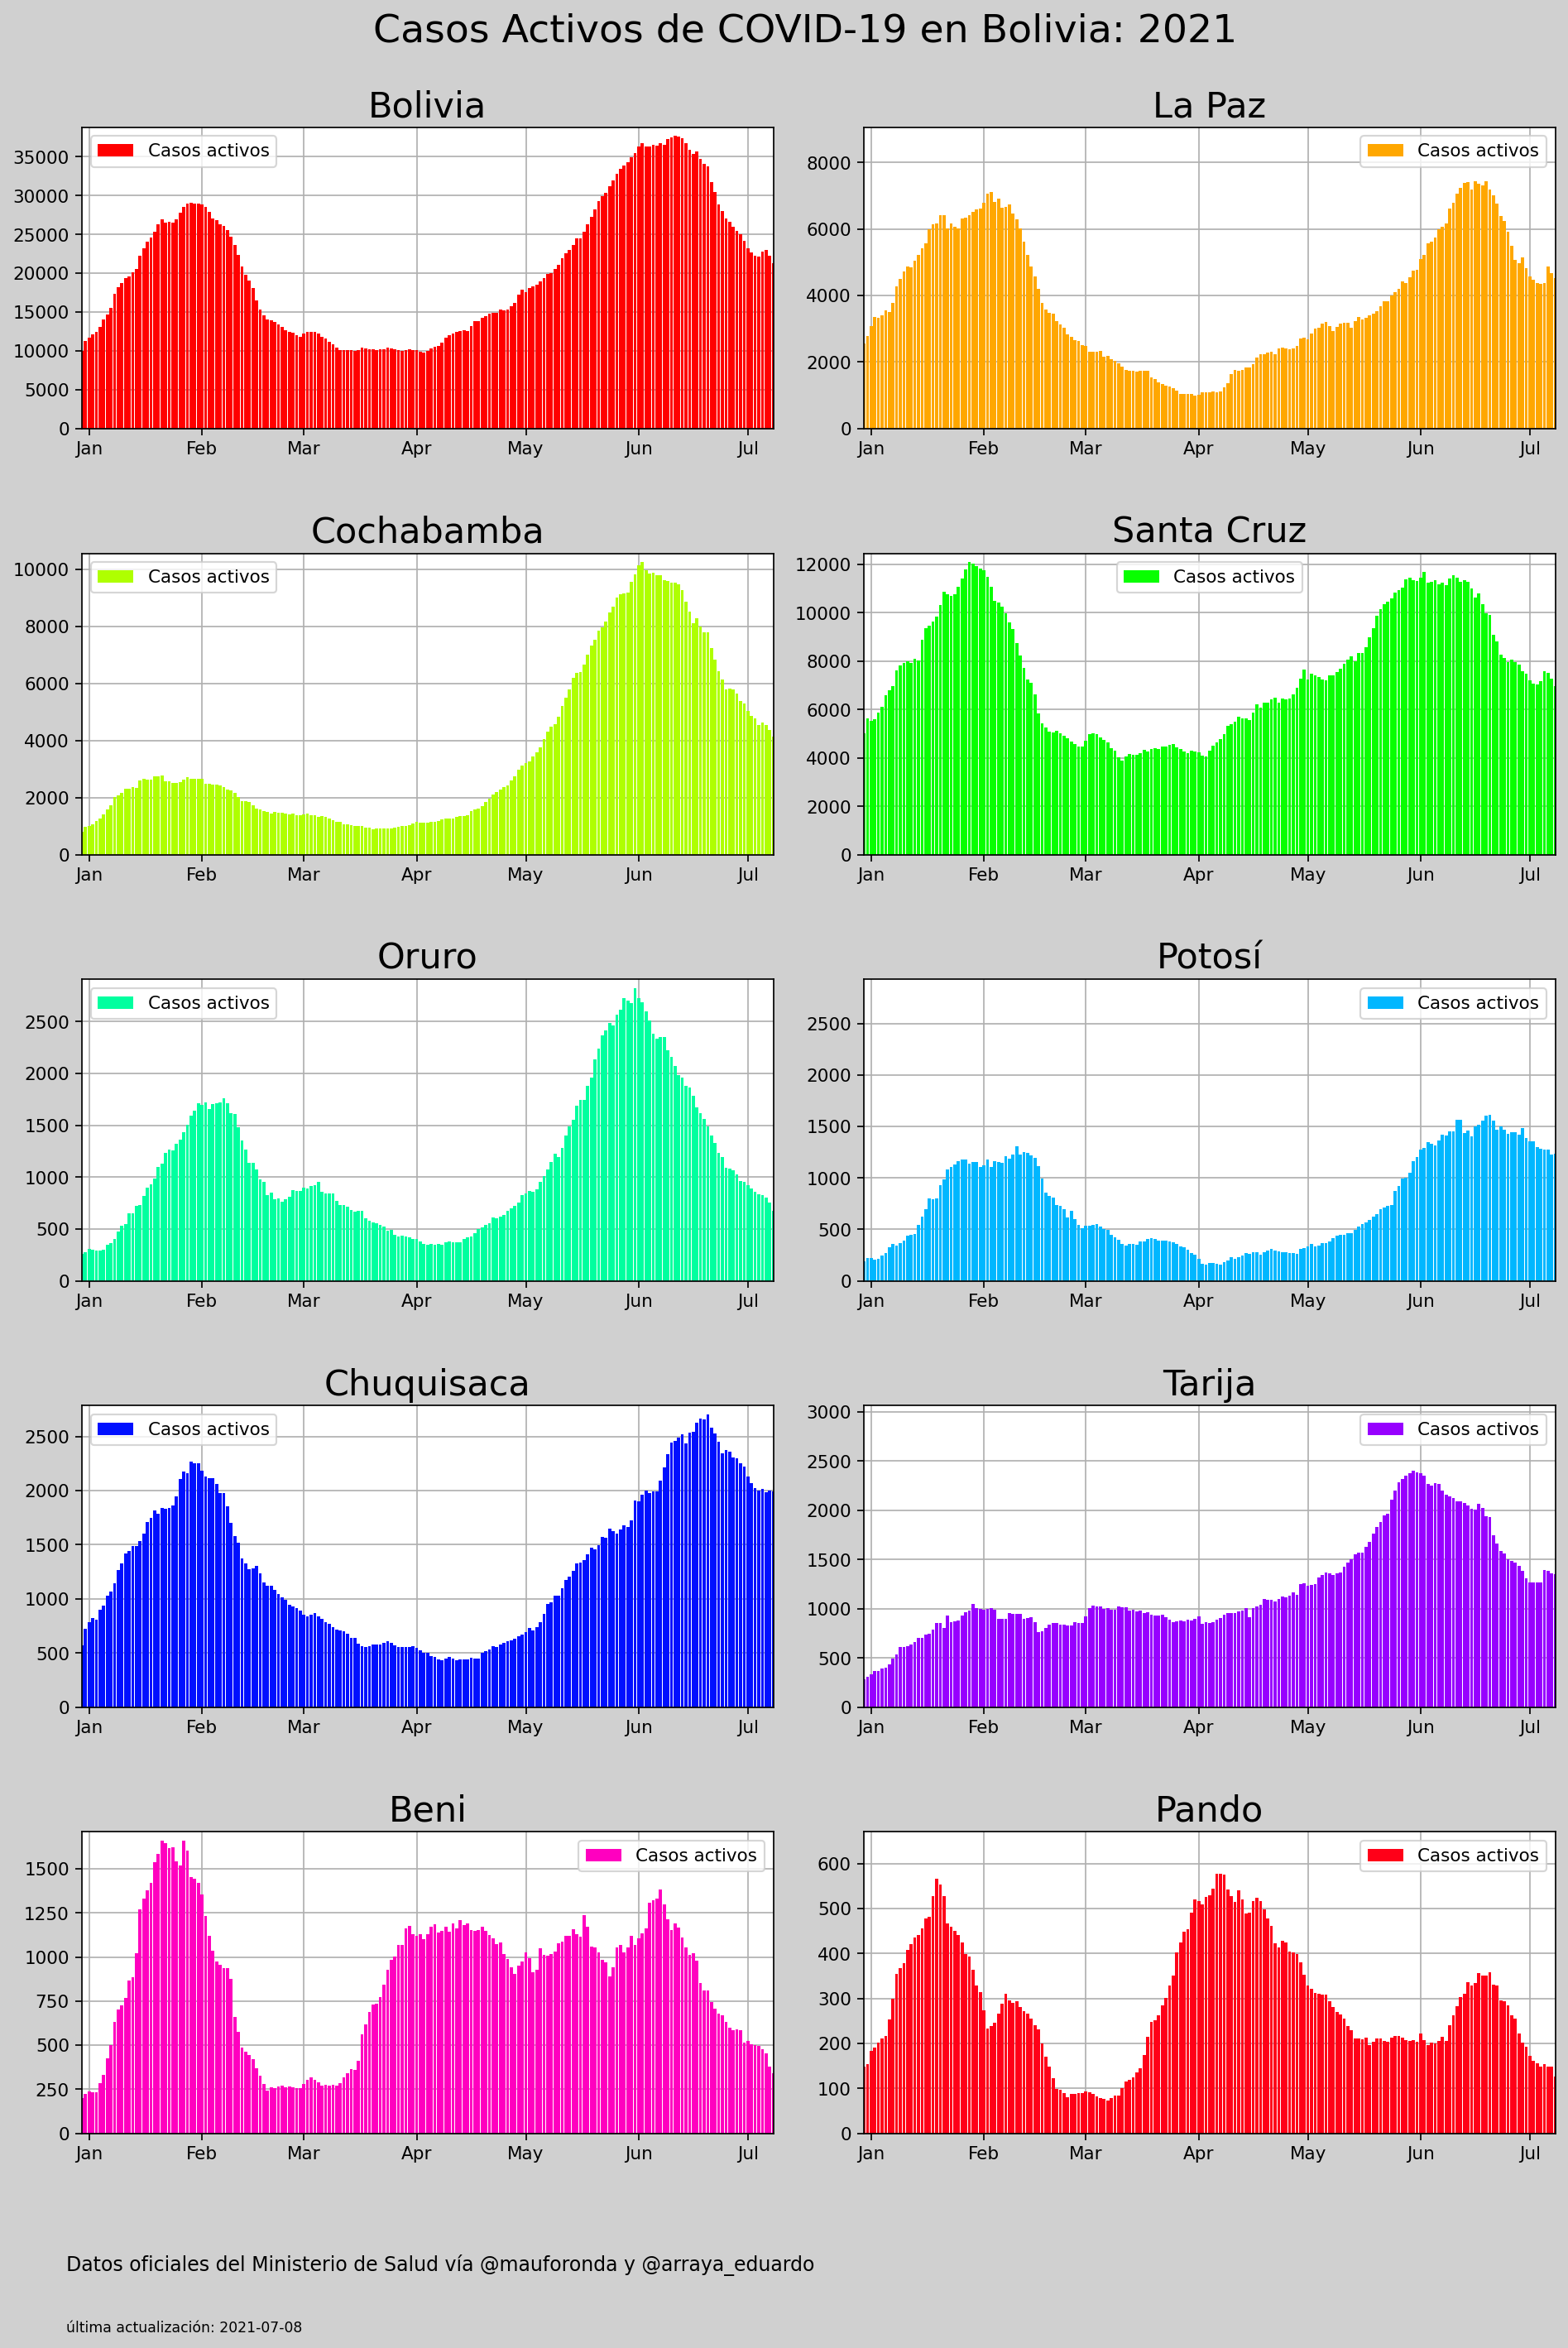

In [30]:
fig, axs = plt.subplots(5,2, figsize = (12,16), dpi=155)
axs = axs.flatten()
fig.tight_layout(pad=0.3, w_pad=2, h_pad=5)

background_color = "#d0d0d0"
background_color2 = "w"

fig.set_facecolor(background_color)

fig.suptitle("Casos Activos de COVID-19 en Bolivia: 2021", fontsize= 22, y=1.05)
fig.text(0.02,-.05,"Datos oficiales del Ministerio de Salud vía @mauforonda y @arraya_eduardo", fontsize=11)
fig.text(.02, -.08,"última actualización: {}".format(muertes_diarias.index[-1].date()), fontsize=8)

for i in range(10):
   axs[i].grid(zorder=3)
   axs[i].set_title(activos.columns[i], fontsize=20) 
   axs[i].bar(activos.index, activos[activos[295:-1].columns[i]], label="Casos activos",width=.85, zorder=2, 
              color = cm.get_cmap("hsv",10)(range(10)[i]))
   axs[i].set_facecolor(background_color2)
   axs[i].legend()
   axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b"))
   axs[i].set_xlim(activos.index[295], activos.index[-1])
   axs[i].set_ylim(0, activos[activos[295:-1].columns[i]].max() * 1.03)



fig.savefig(directory + "graficas/activos.jpg", bbox_inches="tight")

In [31]:
activos_ultimo = activos[-1:]
activos_ultimo.T


2021-07-08
Bolivia        21334.0
La Paz          4532.0
Cochabamba      4128.0
Santa Cruz      6960.0
Oruro            673.0
Potosí          1236.0
Chuquisaca      1991.0
Tarija          1347.0
Beni             341.0
Pando            126.0

In [32]:
activos_ultimo.index = ["Activos por cada 10,000 habitantes"]
habitantes.index = ["Activos por cada 10,000 habitantes"]
activos_ultimo_pc = activos_ultimo / habitantes * 10000
activos_ultimo_pc.T


Activos por cada 10,000 habitantes
Bolivia                              18.359725
La Paz                               15.483430
Cochabamba                           20.344998
Santa Cruz                           20.652819
Oruro                                12.509294
Potosí                               13.702882
Chuquisaca                           31.255887
Tarija                               23.104631
Beni                                  7.104167
Pando                                 8.181818

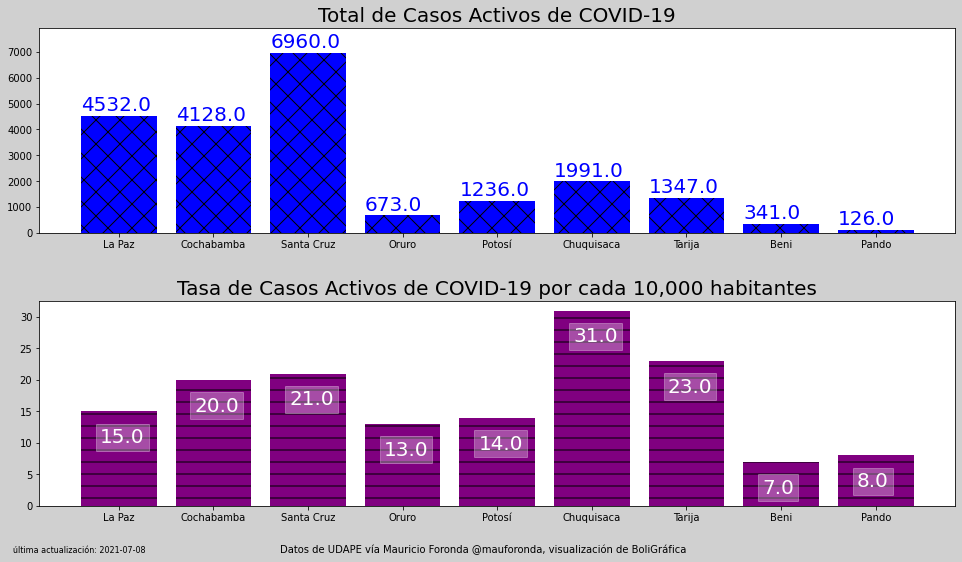

In [33]:
fig, axs = plt.subplots(2,1, figsize=(14,8))

background_color = "#d0d0d0"
background_color2 = "w"

fig.set_facecolor(background_color)

axs[0].bar(activos_ultimo.T.index[1:10], 
           activos_ultimo.T[1:10][activos_ultimo.T.columns[0]],
           color = "b", hatch = "x")
axs[0].set_title("Total de Casos Activos de COVID-19", fontsize = 20)
axs[0].set_ylim(0,activos_ultimo.T[1:10][activos_ultimo.T.columns[0]].max()*1.14)
for p in axs[0].patches:
    axs[0].annotate(
        str(p.get_height()),
        (p.get_x() - 0,
        p.get_height()+200),
        fontsize = 20,
        color = "b")


axs[1].bar(activos_ultimo_pc.T.index[1:10], 
           activos_ultimo_pc.T.round(decimals=0)[1:10]["Activos por cada 10,000 habitantes"],
           color = "purple", hatch = "-")
axs[1].set_title("Tasa de Casos Activos de COVID-19 por cada 10,000 habitantes", fontsize = 20)

for p in axs[1].patches:
     axs[1].annotate(
         str(p.get_height()),
         xy = (p.get_x() + 0.2, p.get_height()-5),
         fontsize=20,
         color = "w",
          bbox={
            'edgecolor': 'w',
            'facecolor': 'w', 
            'alpha': 0.3}
         )



fig.tight_layout(pad=3)

fig.text(0.3,0,"Datos de UDAPE vía Mauricio Foronda @mauforonda, visualización de BoliGráfica")
fig.text(.036, -.0,"última actualización: {}".format(muertes_diarias.index[-1].date()), fontsize=8)


fig.savefig(directory + "graficas/activos_pc.jpg", bbox_inches = "tight")